In [21]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, \
    mean_absolute_percentage_error, median_absolute_error, r2_score, mean_poisson_deviance, d2_absolute_error_score

from DataPrep import load_data

In [22]:
SPLIT_RATIO = 0.9

In [23]:
df = load_data()
df

,Close
Date,
1980-03-17,3.145833
1980-03-18,3.031250
1980-03-19,3.041667
1980-03-20,3.010417
1980-03-21,2.916667
...,...
2023-05-18,107.930000
2023-05-19,105.820000
2023-05-22,108.000000


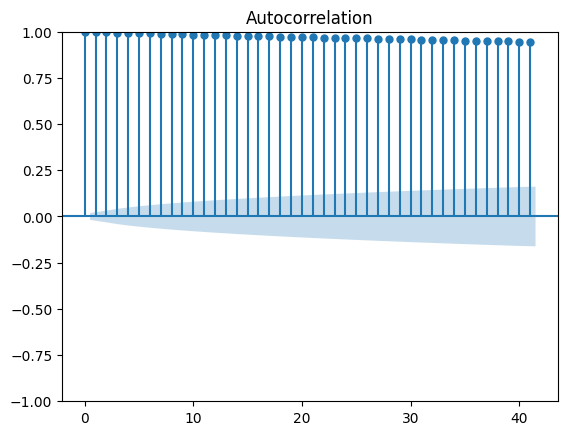

In [59]:
plot_acf(df['Close'])
plt.savefig('./plots/ARIMA_ACF.png')
plt.show()

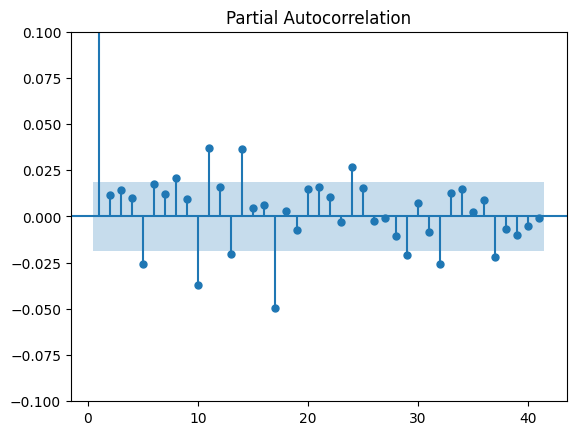

In [44]:
plot_pacf(df['Close'], method='ywm', zero=False)
plt.ylim(-0.1, 0.1)
plt.savefig('./plots/ARIMA_PACF.png')
plt.show()

In [26]:
model = auto_arima(df['Close'], max_order=12, max_p=10, max_d=2, max_q=10, seasonal=False,
                   maxiter=100, information_criterion='aic', out_of_sample_size=int(len(df) * (1 - SPLIT_RATIO)),
                   stepwise=False, n_jobs=-1)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                11268
Model:               SARIMAX(2, 1, 8)   Log Likelihood              -15391.028
Date:                Thu, 25 May 2023   AIC                          30806.056
Time:                        16:54:20   BIC                          30894.011
Sample:                             0   HQIC                         30835.653
                              - 11268                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0259      0.025      1.028      0.304      -0.023       0.075
ar.L1         -0.8733      0.002   -537.309      0.000      -0.876      -0.870
ar.L2         -0.9779      0.002   -628.635      0.000      -0.981      -0.975
ma.L1          0.8563      0.004    236.869      0.000       0.849       0.863
ma.L2          0.9447      0.004    223.339      0.000       0.936       0.953
ma.L3         -0.0428      0.005     -8.486      0.000      -0.053      -0.033
ma.L4          0.0028      0.005      0.605      0.546      -0.006       0.012
ma.L5          0.0222      0.005      4.797      0.000       0.013       0.031
ma.L6          0.0277      0.005      5.703      0.000       0.018       0.037
ma.L7         -0.0217      0.004     -4.956      0.000      -0.030      -0.013
ma.L8         -0.0166      0.003     -5.354      0.000      -0.023      -0.011
sigma2         0.9005      0.003    301.243      0.000       0.895       0.906
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            508245.41
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              23.92   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
model

ARIMA(maxiter=100, order=(2, 1, 8), out_of_sample_size=1126, scoring_args={},
      suppress_warnings=True)

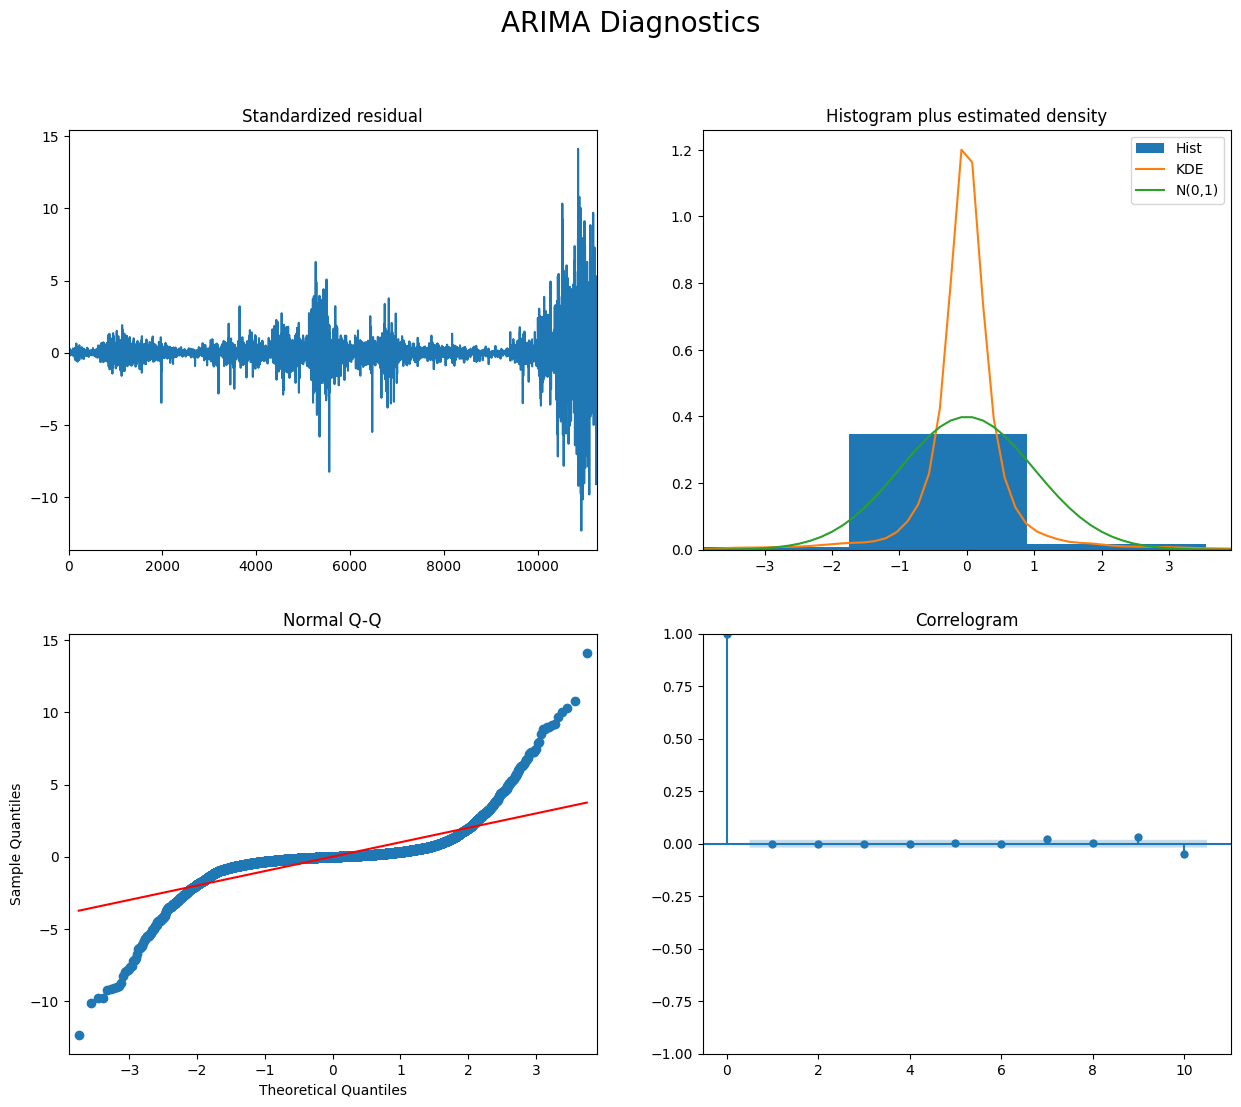

In [58]:
fig = model.plot_diagnostics(figsize=(15, 12))
fig.suptitle('ARIMA Diagnostics', fontsize=20)
plt.savefig('./plots/ARIMA_Diagnostics.png')
plt.show()

In [29]:
split_index = int(len(df) * SPLIT_RATIO)

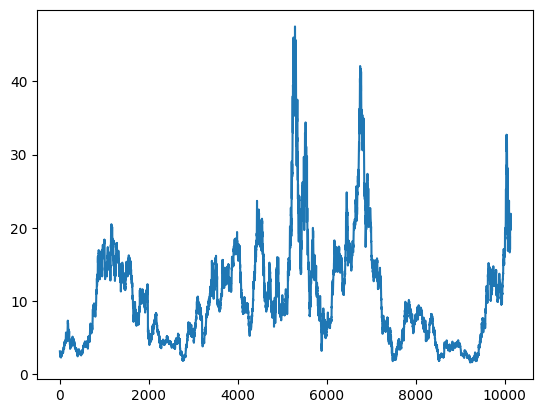

In [30]:
plt.plot(df['Close'][:split_index].values)

In [39]:
predictions = model.predict(n_periods=len(df[split_index:]))
test = df[split_index:]['Close'].values

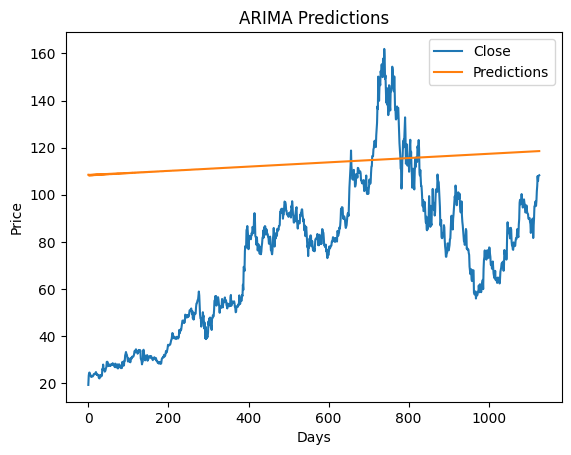

In [46]:
plt.plot(test)
plt.plot(predictions)
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend(['Close', 'Predictions'])
plt.title('ARIMA Predictions')
plt.savefig('./plots/ARIMA_Predictions.png')
plt.show()

In [33]:
print(f'Explained Variance Score: {explained_variance_score(test, predictions):.4f}')
print(f'Mean Absolute Error: {mean_absolute_error(test, predictions):.4f}')

Explained Variance Score: 0.1227
Mean Absolute Error: 42.5862


In [34]:
print(f'Mean Squared Error: {mean_squared_error(test, predictions):.4f}')
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(test, predictions):.4f}')

Mean Squared Error: 2411.7744
Mean Absolute Percentage Error: 0.9424


In [35]:
print(f'Median Absolute Error: {median_absolute_error(test, predictions):.4f}')
print(f'R2 Score: {r2_score(test, predictions):.4f}')

Median Absolute Error: 35.7925
R2 Score: -1.4490


In [36]:
print(f'Mean Poisson Deviance: {mean_poisson_deviance(test, predictions):.4f}')
print(f'D2 Absolute Error Score: {d2_absolute_error_score(test, predictions):.4f}')

Mean Poisson Deviance: 28.4184
D2 Absolute Error Score: -0.6827
